In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('laptop_prices.csv')
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [3]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [30]:
df['Price_twd'] = df['Price_euros'] * 35
df['Price_twd']

0       46889.15
1       31462.90
2       20125.00
3       88810.75
4       63126.00
          ...   
1270    22330.00
1271    52465.00
1272     8015.00
1273    26740.00
1274    12915.00
Name: Price_twd, Length: 1275, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [32]:
df['OS'].unique() #找出可能有誤的系統以及不想分析的欄位


array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [18]:
mask = df['OS'] != 'Mac OS X' and df['OS'] != 'Android' and  df['OS'] != 'Windows 10 S'
df2 = df[mask]
df2.info()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [34]:
mask = (df['OS'] != 'No OS') & (df['OS'] != 'Mac OS X') & (df['OS'] != 'Android') & (df['OS'] != 'Windows 10 S')
df2 = df[mask]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1191 non-null   object 
 1   Product               1191 non-null   object 
 2   TypeName              1191 non-null   object 
 3   Inches                1191 non-null   float64
 4   Ram                   1191 non-null   int64  
 5   OS                    1191 non-null   object 
 6   Weight                1191 non-null   float64
 7   Price_euros           1191 non-null   float64
 8   Screen                1191 non-null   object 
 9   ScreenW               1191 non-null   int64  
 10  ScreenH               1191 non-null   int64  
 11  Touchscreen           1191 non-null   object 
 12  IPSpanel              1191 non-null   object 
 13  RetinaDisplay         1191 non-null   object 
 14  CPU_company           1191 non-null   object 
 15  CPU_freq              1191

In [35]:
#另一種寫法
mask = ~df['OS'].isin(['No OS','Mac OS X','Android','Windows 10 S'])
df_OS_clear = df[mask]
df_OS_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1191 non-null   object 
 1   Product               1191 non-null   object 
 2   TypeName              1191 non-null   object 
 3   Inches                1191 non-null   float64
 4   Ram                   1191 non-null   int64  
 5   OS                    1191 non-null   object 
 6   Weight                1191 non-null   float64
 7   Price_euros           1191 non-null   float64
 8   Screen                1191 non-null   object 
 9   ScreenW               1191 non-null   int64  
 10  ScreenH               1191 non-null   int64  
 11  Touchscreen           1191 non-null   object 
 12  IPSpanel              1191 non-null   object 
 13  RetinaDisplay         1191 non-null   object 
 14  CPU_company           1191 non-null   object 
 15  CPU_freq              1191

In [36]:
df_OS_clear.to_csv('laptop_OS_clear.csv',index = False)

In [40]:
# 設定中文字體
plt.rcParams["font.family"] = "Microsoft YaHei"
plt.rcParams["font.size"] = 16

<Axes: xlabel='Company'>

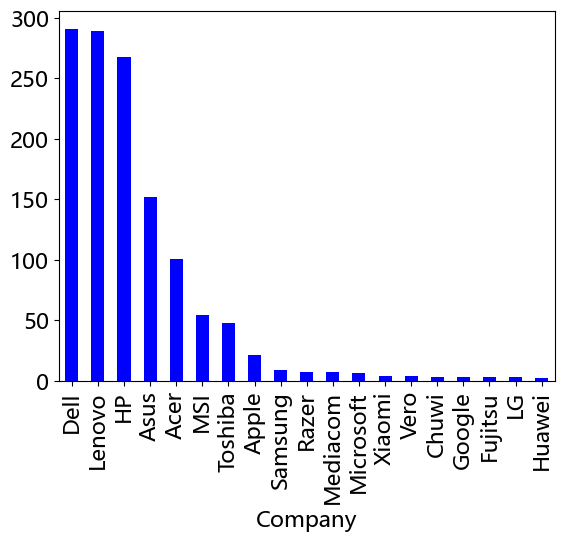

In [41]:
df['Company'].value_counts().plot(kind = 'bar' ,color = 'blue')

<Axes: xlabel='Company'>

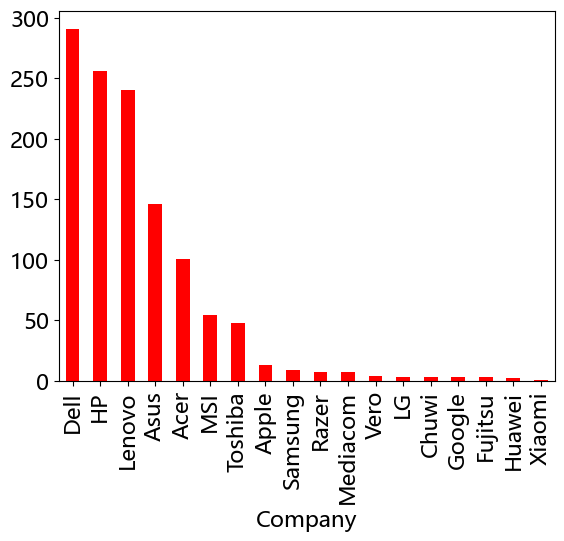

In [42]:
df_OS_clear['Company'].value_counts().plot(kind = 'bar' ,color = 'red')

<Axes: xlabel='OS'>

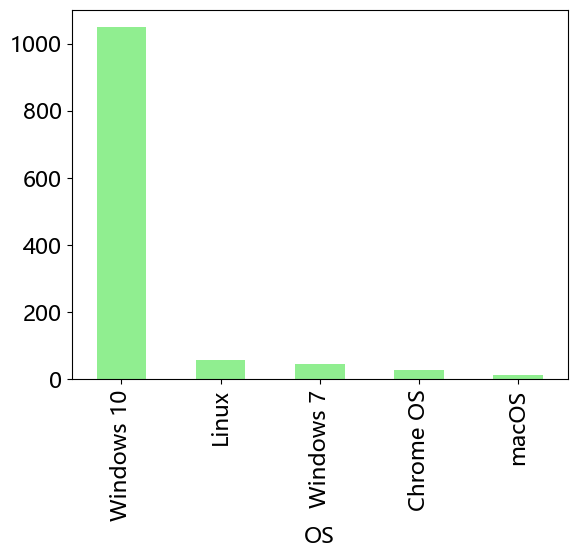

In [43]:
df_OS_clear['OS'].value_counts().plot(kind='bar',color='lightgreen')

In [44]:
ram_price_avg = df_OS_clear.groupby('Ram')['Price_twd'].mean().reset_index()

In [46]:
ram_price_avg2 = df_OS_clear.groupby('Ram').agg({'Price_twd': 'mean'}).reset_index()

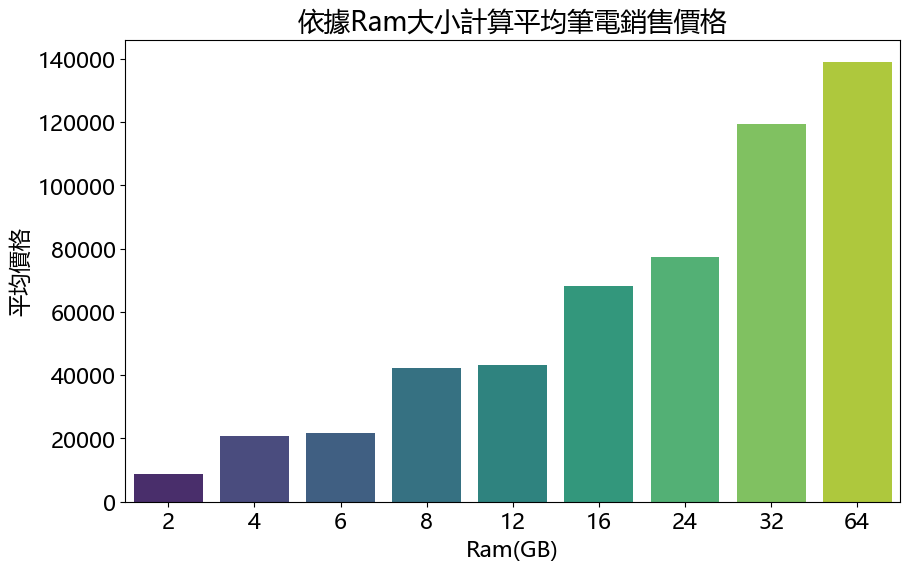

In [45]:
plt.figure(figsize=(10, 6))  
# palette調色盤參數 可放hls,viridis 
sns.barplot(x = 'Ram', y = 'Price_twd' ,data = ram_price_avg,palette = 'viridis')
plt.title("依據Ram大小計算平均筆電銷售價格")
plt.xlabel('Ram(GB)')
plt.ylabel('平均價格')
plt.show()

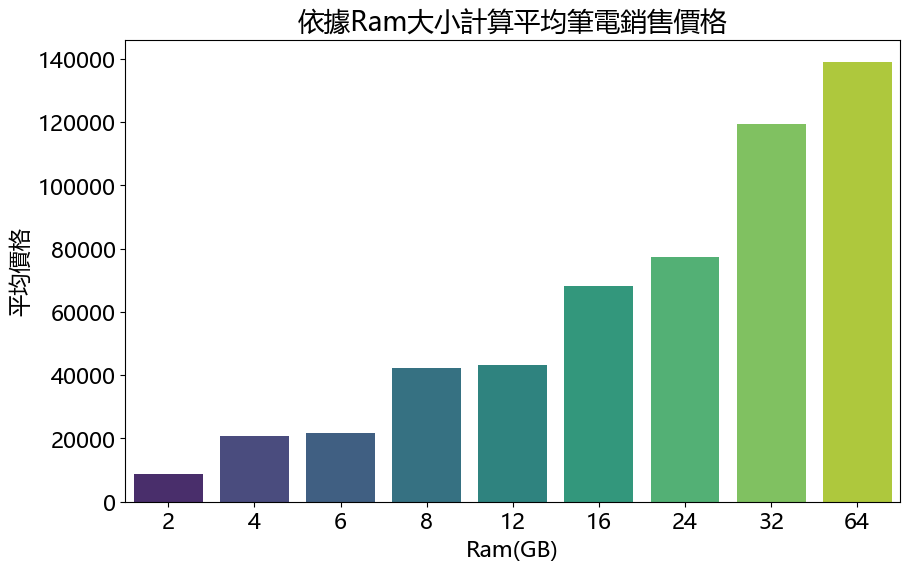

In [47]:
plt.figure(figsize=(10, 6))  
# palette調色盤參數 可放hls,viridis 
sns.barplot(x = 'Ram', y = 'Price_twd' ,data = ram_price_avg2,palette = 'viridis')
plt.title("依據Ram大小計算平均筆電銷售價格")
plt.xlabel('Ram(GB)')
plt.ylabel('平均價格')
plt.show()

<Axes: xlabel='Ram'>

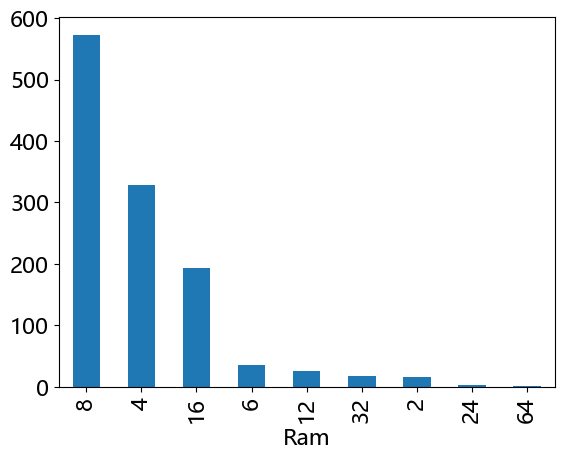

In [53]:
df_OS_clear['Ram'].value_counts().plot(kind = 'bar')

In [54]:
ram_price_sum = df_OS_clear.groupby('Ram')['Price_twd'].sum().reset_index()

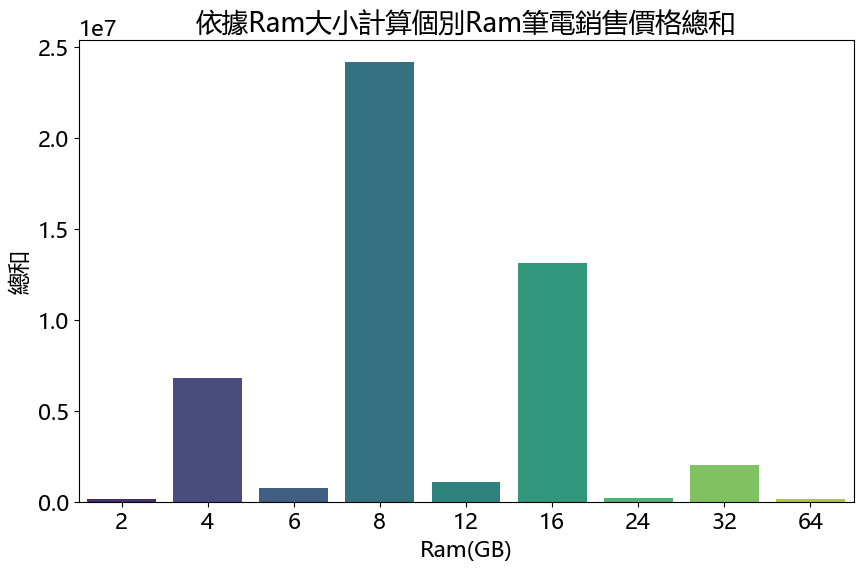

In [55]:
plt.figure(figsize=(10, 6))  
# palette調色盤參數 可放hls,viridis 
sns.barplot(x = 'Ram', y = 'Price_twd' ,data = ram_price_sum,palette = 'viridis')
plt.title("依據Ram大小計算個別Ram筆電銷售價格總和")
plt.xlabel('Ram(GB)')
plt.ylabel('總和')
plt.show()

In [49]:
company_price_avg = df_OS_clear.groupby('Company')['Price_twd'].mean().reset_index()

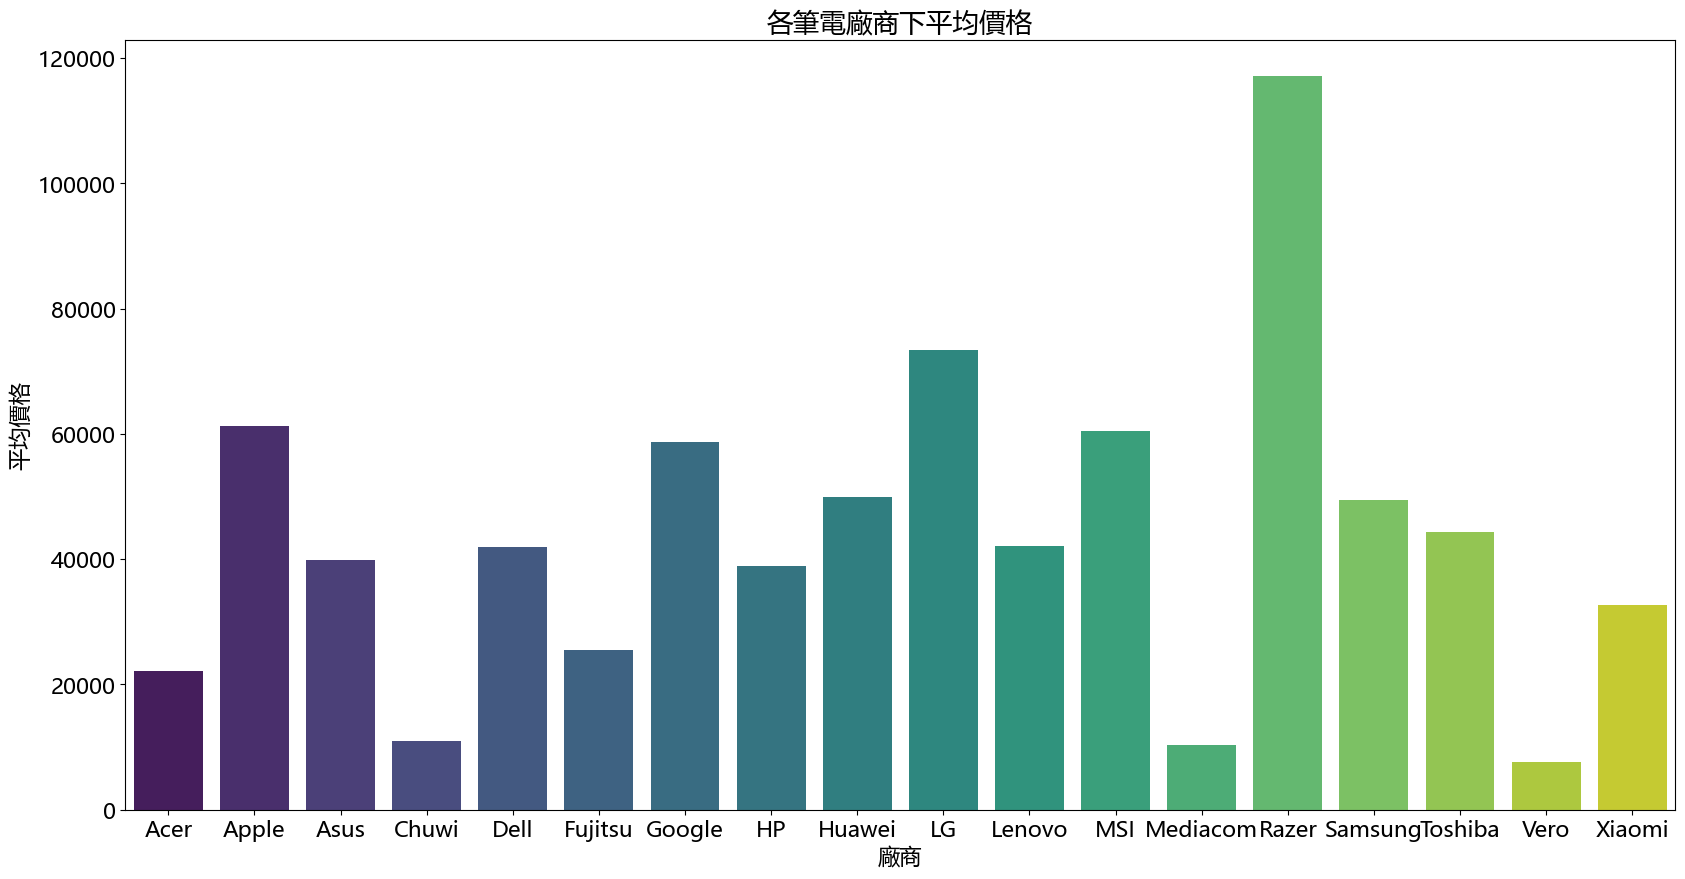

In [52]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Company', y='Price_twd', data = company_price_avg, palette = 'viridis')
plt.title('各筆電廠商下平均價格')
plt.xlabel('廠商')
plt.ylabel('平均價格')
plt.show()

In [56]:
company_price_sum = df_OS_clear.groupby('Company')['Price_twd'].sum().reset_index()

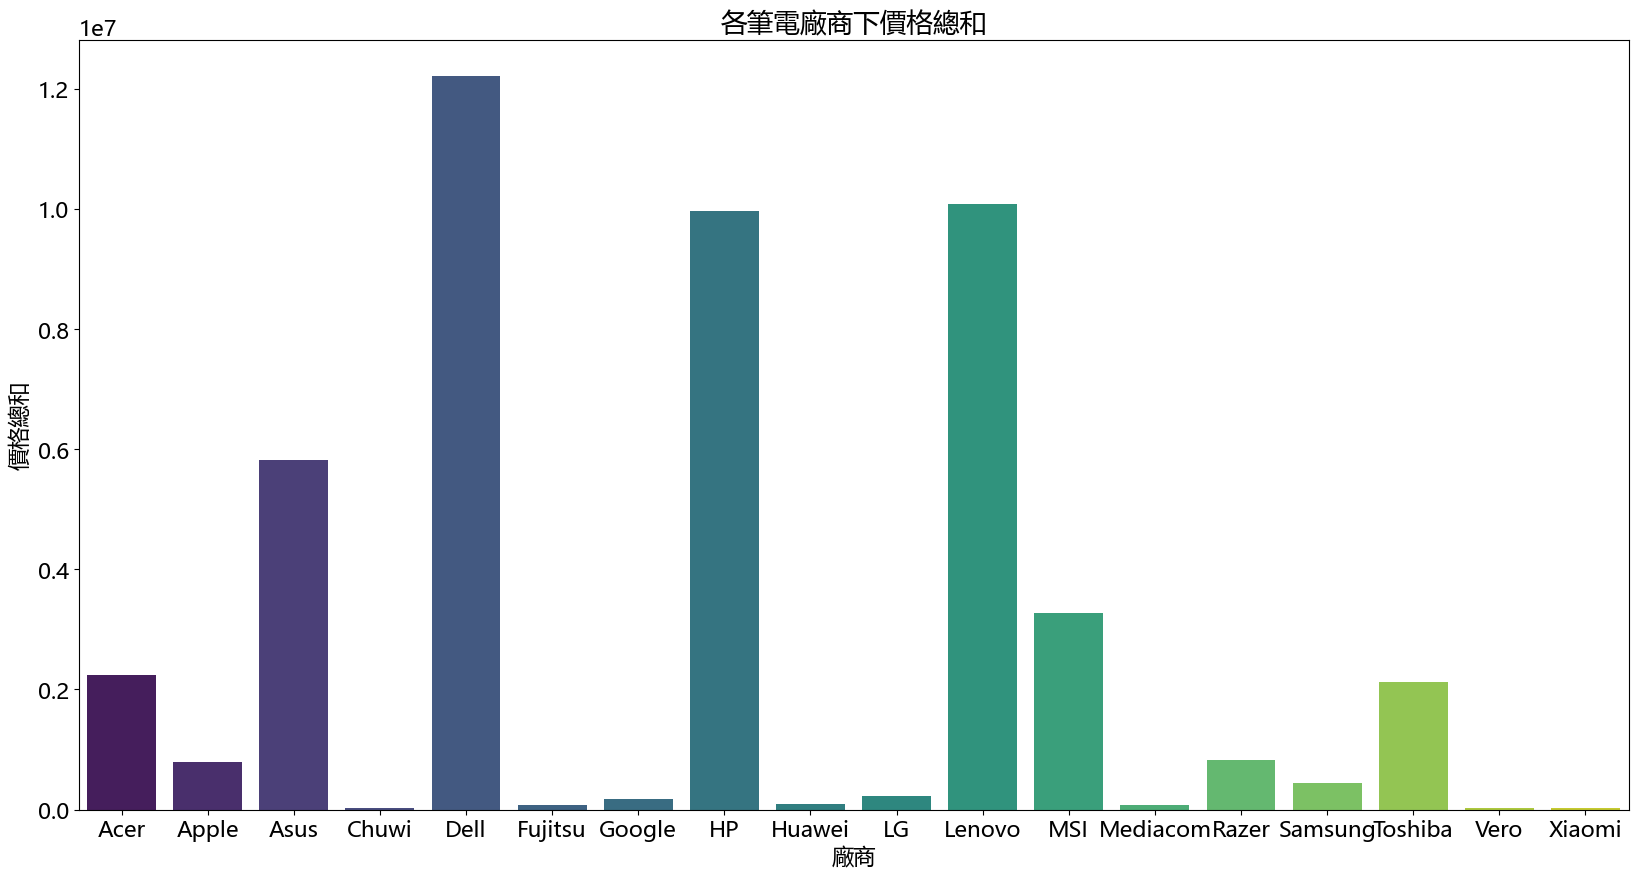

In [57]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Company', y='Price_twd', data = company_price_sum, palette = 'viridis')
plt.title('各筆電廠商下價格總和')
plt.xlabel('廠商')
plt.ylabel('價格總和')
plt.show()